# Introduction


**What?** Make data normal with quantile transform



# Import modules

In [1]:
from pandas import DataFrame
from numpy import exp, mean, std
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# What is quantile transform?


- **Issue**: Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian or standard probability distribution
- **Possible solution**: Quantile transforms are a technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution 


- A quantile transform will map a variable’s probability distribution to another probability distribution. 
- A quantile function, also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). 
- A CDF is a function that returns the probability of a value at or below a **given value**. 
- The PPF is the inverse of this function and returns the value at or below a **given probability**.



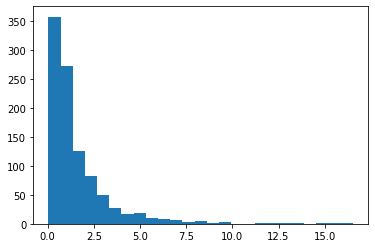

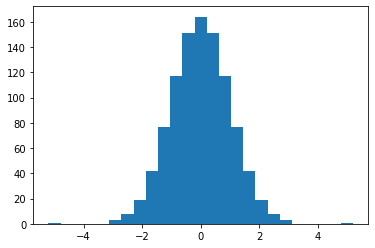

In [2]:
# Create some skew data 
data = randn(1000)
data = exp(data)
pyplot.hist(data, bins=25)
pyplot.show()

# Apply quantile transform
data = data.reshape((len(data),1))
quantile = QuantileTransformer(output_distribution='normal') 
data_trans = quantile.fit_transform(data)
pyplot.hist(data_trans, bins=25)
pyplot.show()

### Sonar dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

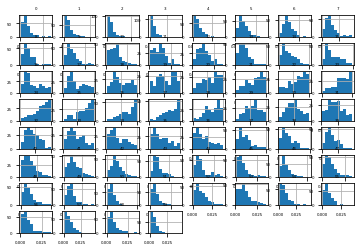

In [3]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None) 
# summarize the shape of the dataset 
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Machine learning model on ORIGINAL dataset

In [4]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))                                           

Accuracy: 0.797 (0.073)


### Normal quantile transform

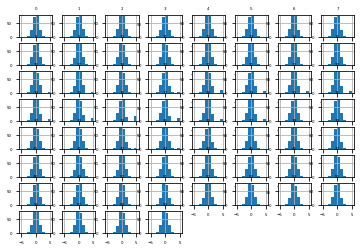

In [5]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


- The distribution of each variable looks **normally distributed** as compared to the raw data



### Machine learning model on TRANSFORMED dataset

In [6]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.817 (0.087)


### Uniform Quantile Transform


- Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution. 
- This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare. 
- We can apply the transform by defining a QuantileTransformer class and setting the output distribution argument to ‘uniform’ (the default).  



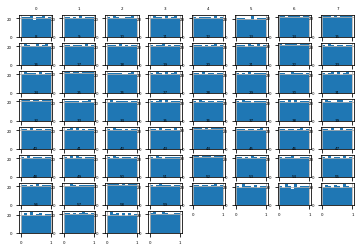

In [7]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Machine learning model on an uniform Quantile Transformed dataset

In [8]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)



- Running the example, we can see that the uniform transform results in a lift in performance from 79.7
percent accuracy without the transform to about 84.5 percent with the transform.
- **Better than the normal transform** that achieved a score of 81.7 percent 



### Hyperparameter tuning


- The number of quantiles can be tuned.
- This hyperparameter can be varied between 1-99 to see how the model behaves.



In [9]:
# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100):
        # define the pipeline
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform') 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
X, y = get_dataset('../DATASETS/sonar.csv')

# get the models to evaluate
models = get_models()

# evaluate the models and store results 
results = list()
for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(mean(scores))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

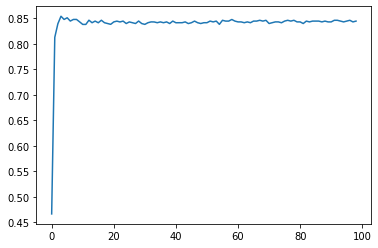

In [10]:
pyplot.plot(results)
pyplot.show()


- A line plot is created showing the number of quantiles used in the transform versus the classification accuracy of the resulting model. 
- We can see a bump with values less than 10 and drop and flat performance
after that. 
- The results highlight that there is likely some benefit in exploring different distributions and number of quantiles to see if better performance can be achieved.



# References


- Data preparation for machine learning, Jason Brownlee

